# Data Initializing

In [2]:
import pandas as pd
import numpy as np
import data_handler as dh
import transport_graph as tg
import model
import time
import pickle
import itertools

In [2]:
net_name = 'Anaheim_net.tntp'
trips_name = 'Anaheim_trips.tntp'

In [3]:
handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns_order = np.array([0, 1, 2, 4]))
graph_data['graph_table']

,Init node,Term node,Capacity,Free Flow Time
0,1,117,9000.0,1.090459
1,2,87,9000.0,1.090459
2,3,74,9000.0,1.090459
3,4,233,9000.0,1.090459
4,5,165,9000.0,1.090459
5,6,213,9000.0,1.090459
6,7,253,9000.0,1.090459
7,8,411,5400.0,1.000000
8,9,379,5400.0,1.000000
9,9,395,5400.0,1.000000


In [4]:
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)
total_od_flow

104694.4

In [5]:
graph = tg.TransportGraph(graph_data)

# Experiment № 1

### $\epsilon = 10^{-3}$

In [ ]:
gammas = np.r_[np.linspace(1.0, 0.2, 9), np.logspace(-1, -4, 10)]
epsilon = 1e-3

flows = []
times = []
iter_nums = []
duality_gaps = []

for gamma in gammas:
    tic = time.time()
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, epsilon = epsilon, 
                               max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    flows.append(result['flows'])
    times.append(result['times'])
    iter_nums.append(result['iter_num'])
    duality_gaps.append(result['duality_gap'])

In [17]:
with open('results_anaheim_exp1_1e-03.pickle', 'wb') as f:
    results = {'flows': flows,
               'times': times,
               'iter_nums': iter_nums,
               'gammas': gammas,
               'duality_gaps': duality_gaps}
    pickle.dump(results, f)

### $\epsilon = 10^{-2}$

In [17]:
gammas_2 = gammas.copy()
epsilon_2 = 1e-2

flows_2 = []
times_2 = []
iter_nums_2 = []
duality_gaps_2 = []

for gamma in gammas_2:
    tic = time.time()
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, 
                               epsilon = epsilon_2, max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    flows_2.append(result['flows'])
    times_2.append(result['times'])
    iter_nums_2.append(result['iter_num'])
    duality_gaps_2.append(result['duality_gap'])

gamma = 1.0
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.071487287965
Success!  Iterations number: 8
Duality_gap / Duality_gap_init = 0.00688932861492
Phi big oracle elapsed time: 38 sec
Elapsed time: 38 sec
gamma = 0.9
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.0884939238865
Success!  Iterations number: 10
Duality_gap / Duality_gap_init = 0.00678023040076
Phi big oracle elapsed time: 46 sec
Elapsed time: 47 sec
gamma = 0.8
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.0822229569547
Success!  Iterations number: 10
Duality_gap / Duality_gap_init = 0.00759739004826
Phi big oracle elapsed time: 50 sec
Elapsed t

Iterations number: 20
Duality_gap / Duality_gap_init = 0.139293345142
Iterations number: 25
Duality_gap / Duality_gap_init = 0.0217954172988
Iterations number: 30
Duality_gap / Duality_gap_init = 0.0125388220822
Success!  Iterations number: 32
Duality_gap / Duality_gap_init = 0.00976343972476
Phi big oracle elapsed time: 198 sec
Elapsed time: 202 sec


In [15]:
with open('results_anaheim_exp1_1e-02.pickle', 'wb') as f:
    results = {'flows': flows_2,
               'times': times_2,
               'iter_nums': iter_nums_2,
               'gammas': gammas_2,
               'duality_gaps': duality_gaps_2}
    pickle.dump(results, f)

Experiment № 1 results saved here:

In [3]:
epsilon = 1e-3
with open('results_anaheim_exp1_1e-3.pickle', 'rb') as f:
    results = pickle.load(f)
    flows = results['flows']
    times = results['times']
    iter_nums = results['iter_nums']
    gammas = results['gammas']
    duality_gaps = results['duality_gaps']

In [3]:
epsilon_2 = 1e-2
with open('results_anaheim_exp1_1e-02.pickle', 'rb') as f:
    results = pickle.load(f)
    flows_2 = results['flows']
    times_2 = results['times']
    iter_nums_2 = results['iter_nums']
    gammas_2 = results['gammas']
    duality_gaps_2 = results['duality_gaps']

FileNotFoundError: [Errno 2] No such file or directory: 'results_anaheim_exp1_1e-02.pickle'

## Plots

In [5]:
import matplotlib.pyplot as plt

In [7]:
def ReadAnswer(filename):
    with open(filename) as myfile:
        lines = myfile.readlines()
    lines = np.array(lines)[range(6, len(lines))]
    values_dict = {'flow': [], 'time': []}
    for line in lines:
        line = line.strip('[ \n]')
        nums = line.split(' \t')
        values_dict['flow'].append(float(nums[3]))
        values_dict['time'].append(float(nums[4]))
    return values_dict

In [8]:
values_dict = ReadAnswer('Anaheim_flow.tntp')
flow_star = values_dict['flow']
time_star = values_dict['time']

### $\epsilon = 10^{-3}$

In [8]:
delta = [np.linalg.norm(flow - flow_star, ord = 1) / np.linalg.norm(flow_star, ord = 1)
         for flow in flows]

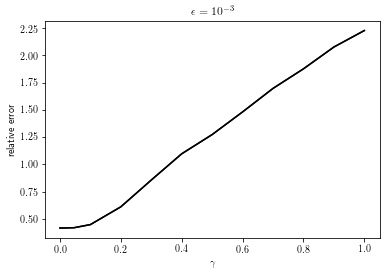

In [11]:
plt.rc('text', usetex = True)
plt.plot(gammas, delta, 'black')
plt.title(r'$\epsilon = 10^{-3}$')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'relative error')
plt.savefig('anaheim_delta_vs_gamma_{0:.0e}.png'.format(epsilon), dpi=300)
plt.show()

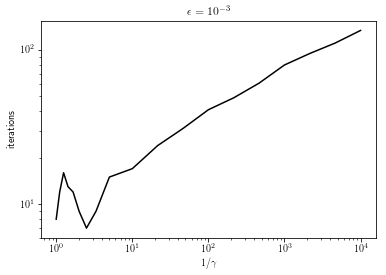

In [8]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / np.array(gammas), iter_nums, 'black')
plt.title(r'$\epsilon = 10^{-3}$')
plt.xlabel(r'$1 / \gamma$')
plt.ylabel(r'iterations')
#plt.savefig('anaheim_iters_vs_gamma_{0:.0e}.png'.format(epsilon), dpi=300)
plt.show()

### $\epsilon = 10^{-2}$

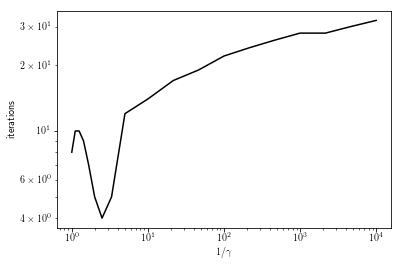

In [20]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / np.array(gammas_2), iter_nums_2, 
           label = r'\varepsilon = {0:.0e}'.format(epsilon_2), 'black')
plt.xlabel(r'$1 / \gamma$')
plt.ylabel(r'iterations')
plt.savefig('anaheim_iters_vs_gamma_{0:.0e}.png'.format(epsilon_2), dpi=300)
plt.show()

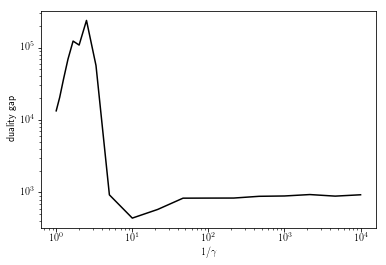

In [21]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / np.array(gammas_2), duality_gaps_2, 'black')
plt.xlabel(r'$1 / \gamma$')
plt.ylabel(r'duality gap')
plt.savefig('anaheim_dual_gap_vs_gamma_{0:.0e}.png'.format(epsilon_2), dpi=300)
plt.show()

# Experiment № 2

### $\gamma = 0.1$ 

In [26]:
epsilons = np.logspace(-1, -6, 11)
gamma_for_epsilons = 0.1

iter_nums_for_epsilons = []
duality_gaps_for_epsilons = []
exec_times_for_epsilons = []

for epsilon in epsilons:
    tic = time.time()
    print('epsilon = ' + str(epsilon))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma_for_epsilons, mu = 0.25, rho = 0.15, 
                               epsilon = epsilon, max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    exec_times_for_epsilons.append(toc - tic)
    iter_nums_for_epsilons.append(result['iter_num'])
    duality_gaps_for_epsilons.append(result['duality_gap'])

epsilon = 0.1
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.837428307632
Iterations number: 10
Duality_gap / Duality_gap_init = 0.118744316397
Success!  Iterations number: 11
Duality_gap / Duality_gap_init = 0.06459982194
Phi big oracle elapsed time: 52 sec
Elapsed time: 53 sec
epsilon = 0.0316227766017
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.837428307632
Iterations number: 10
Duality_gap / Duality_gap_init = 0.118744316397
Success!  Iterations number: 12
Duality_gap / Duality_gap_init = 0.0287048298109
Phi big oracle elapsed time: 57 sec
Elapsed time: 58 sec
epsilon = 0.01
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality

In [57]:
with open('results_anaheim_exp2_{0:.0e}.pickle'.format(gamma_for_epsilons), 'wb') as f:
    results = {'iter_nums': iter_nums_for_epsilons,
               'exec_times': exec_times_for_epsilons,
               'duality_gaps': duality_gaps_for_epsilons,
               'epsilons': epsilons}
    pickle.dump(results, f)

### $\gamma = 0.01$

In [9]:
epsilons_2 = np.logspace(-1, -6, 11)
gamma_for_epsilons_2 = 1e-2

iter_nums_for_epsilons_2 = []
duality_gaps_for_epsilons_2 = []
exec_times_for_epsilons_2 = []

for epsilon in epsilons_2:
    tic = time.time()
    print('epsilon = ' + str(epsilon))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma_for_epsilons_2, mu = 0.25, rho = 0.15, 
                               epsilon = epsilon, max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    exec_times_for_epsilons_2.append(toc - tic)
    iter_nums_for_epsilons_2.append(result['iter_num'])
    duality_gaps_for_epsilons_2.append(result['duality_gap'])

epsilon = 0.1
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.955520201395
Iterations number: 10
Duality_gap / Duality_gap_init = 0.701684724114
Success!  Iterations number: 14
Duality_gap / Duality_gap_init = 0.080289807592
Phi big oracle elapsed time: 70 sec
Elapsed time: 75 sec
epsilon = 0.0316227766017
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.955520201395
Iterations number: 10
Duality_gap / Duality_gap_init = 0.701684724114
Iterations number: 15
Duality_gap / Duality_gap_init = 0.0540579089138
Success!  Iterations number: 18
Duality_gap / Duality_gap_init = 0.0226308648323
Phi big oracle elapsed time: 90 sec
Elapsed time: 92 sec
epsilon = 0.01
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality

Iterations number: 55
Duality_gap / Duality_gap_init = 9.12092142836e-05
Iterations number: 60
Duality_gap / Duality_gap_init = 3.89457053266e-05
Iterations number: 65
Duality_gap / Duality_gap_init = 2.60674629463e-05
Iterations number: 70
Duality_gap / Duality_gap_init = 1.54611360778e-05
Iterations number: 75
Duality_gap / Duality_gap_init = 1.02838630422e-05
Iterations number: 80
Duality_gap / Duality_gap_init = 8.65344916799e-06
Iterations number: 85
Duality_gap / Duality_gap_init = 3.91556887497e-06
Iterations number: 90
Duality_gap / Duality_gap_init = 6.99781171391e-06
Iterations number: 95
Duality_gap / Duality_gap_init = 5.47180447805e-06
Success!  Iterations number: 98
Duality_gap / Duality_gap_init = 2.46601062189e-06
Phi big oracle elapsed time: 629 sec
Elapsed time: 640 sec
epsilon = 1e-06
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.955520201395

In [11]:
with open('results_anaheim_exp2_{0:.0e}.pickle'.format(gamma_for_epsilons_2), 'wb') as f:
    results = {'iter_nums': iter_nums_for_epsilons_2,
               'exec_times': exec_times_for_epsilons_2,
               'duality_gaps': duality_gaps_for_epsilons_2,
               'epsilons': epsilons_2}
    pickle.dump(results, f)

In [12]:
dual_gap_histories = result['dual_gap_history']


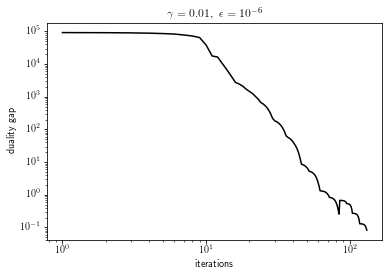

In [13]:
gamma = gamma_for_epsilons_2
plt.rc('text', usetex = True)
plt.loglog(range(len(dual_gap_histories)),
         np.array(dual_gap_histories), 'black')
plt.xlabel(r'iterations')
plt.ylabel(r'duality gap')
plt.title(r'$\gamma = 0.01, \; \epsilon = 10^{-6}$')
#plt.title(r'$\gamma = {0}$'.format(gamma))
plt.legend()
plt.savefig('dual_gap_vs_iters_{0:.0e}.png'.format(gamma),              
            dpi = 300)
plt.show()

In [ ]:
with open('results_anaheim_exp2_{0:.0e}.pickle'.format(gamma_for_epsilons_2), 'wb') as f:
    results = {'iter_nums': iter_nums_for_epsilons_2,
               'exec_times': exec_times_for_epsilons_2,
               'duality_gaps': duality_gaps_for_epsilons_2,
               'epsilons': epsilons_2}
    pickle.dump(results, f)

Experiment № 2 results saved here:

In [56]:
gamma_for_epsilons = 1e-1
with open('results_anaheim_exp2_{0:.0e}.pickle'.format(gamma_for_epsilons), 'rb') as f:
    results = pickle.load(f)
    iter_nums_for_epsilons = results['iter_nums']
    exec_times_for_epsilons = results['exec_times']
    duality_gaps_for_epsilons = results['duality_gaps']
    epsilons = results['epsilons']

In [17]:
gamma_for_epsilons_2 = 1e-2
with open('results_anaheim_exp2_{0:.0e}.pickle'.format(gamma_for_epsilons_2), 'rb') as f:
    results = pickle.load(f)
    iter_nums_for_epsilons_2 = results['iter_nums']
    exec_times_for_epsilons_2 = results['exec_times']
    duality_gaps_for_epsilons_2 = results['duality_gaps']
    epsilons_2 = results['epsilons']

FileNotFoundError: [Errno 2] No such file or directory: 'results_anaheim_exp2_1e-02.pickle'

## Plots

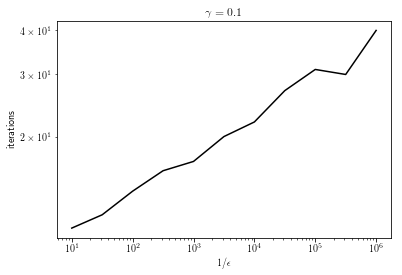

In [70]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / epsilons, iter_nums_for_epsilons, 'black')
plt.xlabel(r'$1 / \epsilon$')
plt.ylabel(r'iterations')
plt.title(r'$\gamma = {0}$'.format(gamma_for_epsilons))
plt.savefig('anaheim_iters_vs_eps_{0:.0e}.png'.format(gamma_for_epsilons), 
            dpi = 300)
plt.show()

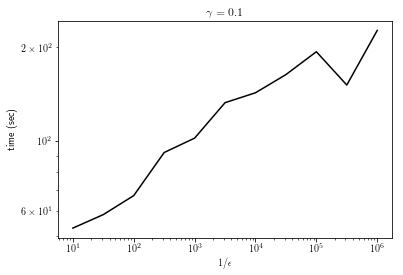

In [69]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / epsilons, exec_times_for_epsilons, 'black')
plt.xlabel(r'$1 / \epsilon$')
plt.ylabel(r'time (sec)')
plt.title(r'$\gamma = {0}$'.format(gamma_for_epsilons))
plt.savefig('anaheim_time_vs_eps_{0:.0e}.png'.format(gamma_for_epsilons), 
            dpi = 300)
plt.show()

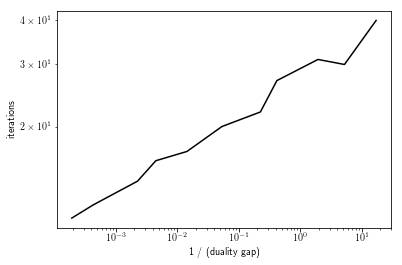

In [31]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / np.array(duality_gaps_for_epsilons), iter_nums_for_epsilons, 'black')
plt.xlabel(r'1 / (duality gap)')
plt.ylabel(r'iterations')
plt.title(r'$\gamma = {0}$'.format(gamma_for_epsilons))
plt.savefig('anaheim_iters_vs_dual_gap_{0:.0e}.png'.format(gamma_for_epsilons), 
            dpi = 300)
plt.show()

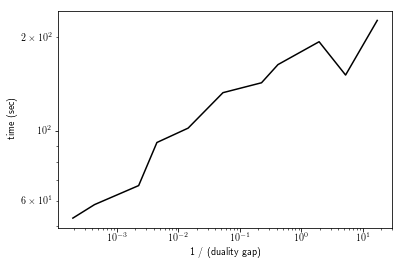

In [32]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / np.array(duality_gaps_for_epsilons), exec_times_for_epsilons, 'black')
plt.xlabel(r'1 / (duality gap)')
plt.ylabel(r'time (sec)')
plt.title(r'$\gamma = {0}$'.format(gamma_for_epsilons))
plt.savefig('times_vs_dual_gap_{0:.0e}.png'.format(gamma_for_epsilons), 
            dpi = 300)
plt.show()

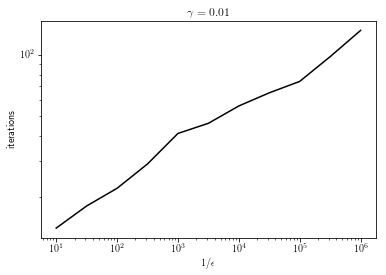

In [14]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / epsilons_2, iter_nums_for_epsilons_2, 'black')
plt.xlabel(r'$1 / \epsilon$')
plt.ylabel(r'iterations')
plt.title(r'$\gamma = {0}$'.format(gamma_for_epsilons_2))
plt.savefig('anaheim_iters_vs_eps_{0:.0e}.png'.format(gamma_for_epsilons_2), 
            dpi = 300)
plt.show()

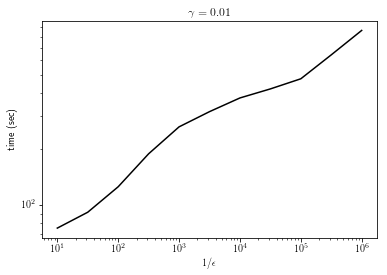

In [15]:
plt.rc('text', usetex = True)
plt.loglog(1.0 / epsilons_2, exec_times_for_epsilons_2, 'black')
plt.xlabel(r'$1 / \epsilon$')
plt.ylabel(r'time (sec)')
plt.title(r'$\gamma = {0}$'.format(gamma_for_epsilons_2))
plt.savefig('anaheim_time_vs_eps_{0:.0e}.png'.format(gamma_for_epsilons_2), 
            dpi = 300)
plt.show()

# Experiment № 3 

In [54]:
epsilon_3 = 1e-6
gammas_3 = [0.1, 0.01]
duality_gap_histories = []

for gamma in gammas_3:
    tic = time.time()
    print('gamma = ' + str(gamma))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, 
                               epsilon = epsilon_3, max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    duality_gap_histories.append(result['dual_gap_history'])

gamma = 0.1
epsilon = 1e-05
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.837427950061
Iterations number: 10
Duality_gap / Duality_gap_init = 0.118744100072
Iterations number: 15
Duality_gap / Duality_gap_init = 0.0054166324355
Iterations number: 20
Duality_gap / Duality_gap_init = 0.000393731467476
Iterations number: 25
Duality_gap / Duality_gap_init = 1.14815531675e-05
Iterations number: 30
Duality_gap / Duality_gap_init = 5.49604489429e-06
Iterations number: 35
Duality_gap / Duality_gap_init = 3.47877383018e-06
Success!  Iterations number: 40
Duality_gap / Duality_gap_init = 7.2265922816e-07
Phi big oracle elapsed time: 294 sec
Elapsed time: 299 sec
gamma = 0.01
epsilon = 1e-05
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.9555202013

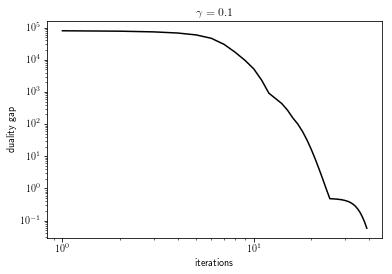

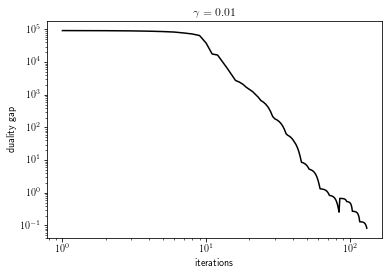

In [67]:
for (gamma, duality_gap_history) in zip(gammas_3, duality_gap_histories):
    plt.rc('text', usetex = True)
    plt.loglog(range(len(duality_gap_history)),
             np.array(duality_gap_history), 'black')
    plt.xlabel(r'iterations')
    plt.ylabel(r'duality gap')
    plt.title(r'$\gamma = {0}$'.format(gamma))
    plt.legend()
    #plt.savefig('dual_gap_vs_iters_{0:.0e}.png'.format(gamma), 
    #             dpi = 300)
    plt.show()

In [51]:
_epsilons = [1e-2, 1e-5]
_gammas = [0.1, 0.01]

gammas_3 = []
epsilons_3 = []
duality_gap_histories = []

for (gamma, epsilon) in itertools.product(_gammas, _epsilons):
    tic = time.time()
    print('gamma = ' + str(gamma))
    print('epsilon = ' + str(epsilon))
    result = model.model_solve(graph, graph_correspondences, total_od_flow, 
                               gamma = gamma, mu = 0.25, rho = 0.15, 
                               epsilon = epsilon, max_iter = 5000, verbose = True)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    gammas_3.append(gamma)
    epsilons_3.append(epsilon)
    duality_gap_histories.append(result['dual_gap_history'])

gamma = 0.1
epsilon = 0.01
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.837427950061
Iterations number: 10
Duality_gap / Duality_gap_init = 0.118744100072
Success!  Iterations number: 14
Duality_gap / Duality_gap_init = 0.005496267434
Phi big oracle elapsed time: 66 sec
Elapsed time: 67 sec
gamma = 0.1
epsilon = 1e-05
Oracles created...
Universal similar triangles function...
Iterations number: 1
Duality_gap / Duality_gap_init = 1.0
Iterations number: 5
Duality_gap / Duality_gap_init = 0.837427950061
Iterations number: 10
Duality_gap / Duality_gap_init = 0.118744100072
Iterations number: 15
Duality_gap / Duality_gap_init = 0.0054166324355
Iterations number: 20
Duality_gap / Duality_gap_init = 0.000240553378368
Iterations number: 25
Duality_gap / Duality_gap_init = 4.08107881794e-05
Success!  Iterations number: 30
Duality_gap / Duality_gap_init = 9.85397591732e

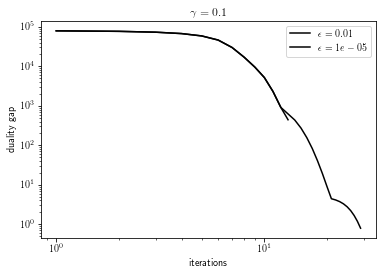

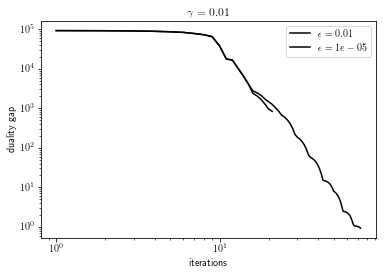

In [53]:
for gamma in _gammas:
    for (duality_gap_history, epsilon) in [_tuple[:-1] for _tuple in \
        zip(duality_gap_histories, epsilons_3, gammas_3) if _tuple[-1] == gamma]:
            plt.rc('text', usetex = True)
            plt.loglog(range(len(duality_gap_history)),
                     np.array(duality_gap_history), 'black', 
                     label = r'$\epsilon = {0}$'.format(epsilon))
            plt.xlabel(r'iterations')
            plt.ylabel(r'duality gap')
            plt.title(r'$\gamma = {0}$'.format(gamma))
            plt.legend()
            plt.savefig('dual_gap_vs_iters_{0:.0e}_{1:.0e}.png'.format(gamma, epsilon), 
                         dpi = 300)
    plt.show()